In [99]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [100]:
passing = pd.read_csv("passingevents.csv")
full = pd.read_csv("fullevents.csv")
matches = pd.read_csv("matches.csv")

In [101]:
passing.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0


In [102]:
full.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,34.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,22.0,0.0,66.0,3.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0


In [103]:
matches.head()

,MatchID,OpponentID,Outcome,OwnScore,OpponentScore,Side,CoachID
0,1,Opponent1,win,1,0,home,Coach1
1,2,Opponent2,tie,1,1,away,Coach1
2,3,Opponent3,loss,0,2,away,Coach1
3,4,Opponent4,loss,0,3,home,Coach1
4,5,Opponent5,loss,0,4,away,Coach1


In [104]:
#所有的tuple2都是图结构，每一个键是一个元组，表示箭头方向，由节点0指向节点1，值表示这条边的权重
tuple2pass_count=defaultdict(int)

In [105]:
for i in passing.itertuples():
    if i.TeamID == 'Huskies':
        tuple2pass_count[(i.OriginPlayerID, i.DestinationPlayerID)] += 1

In [106]:
# 依据传球成功数来排序
sorted_by_pass = sorted(tuple2pass_count.keys(),key = lambda x:tuple2pass_count[x],reverse=True)

In [107]:
sorted_by_pass[0:20]

[('Huskies_M1', 'Huskies_F2'),
 ('Huskies_M3', 'Huskies_M1'),
 ('Huskies_M1', 'Huskies_M3'),
 ('Huskies_D3', 'Huskies_G1'),
 ('Huskies_F2', 'Huskies_M1'),
 ('Huskies_D1', 'Huskies_G1'),
 ('Huskies_D1', 'Huskies_D3'),
 ('Huskies_D3', 'Huskies_D1'),
 ('Huskies_D5', 'Huskies_F2'),
 ('Huskies_D1', 'Huskies_M1'),
 ('Huskies_M3', 'Huskies_D4'),
 ('Huskies_M1', 'Huskies_D1'),
 ('Huskies_F2', 'Huskies_D5'),
 ('Huskies_M1', 'Huskies_D4'),
 ('Huskies_M1', 'Huskies_D5'),
 ('Huskies_G1', 'Huskies_F1'),
 ('Huskies_M1', 'Huskies_M6'),
 ('Huskies_G1', 'Huskies_D1'),
 ('Huskies_D5', 'Huskies_M1'),
 ('Huskies_M3', 'Huskies_D1')]

In [108]:
for i in sorted_by_pass[0:20]:
    print(tuple2pass_count[i])

182
168
143
120
117
107
105
98
97
92
88
85
84
79
79
77
77
76
75
74


In [109]:
sorted_by_pass

[('Huskies_M1', 'Huskies_F2'),
 ('Huskies_M3', 'Huskies_M1'),
 ('Huskies_M1', 'Huskies_M3'),
 ('Huskies_D3', 'Huskies_G1'),
 ('Huskies_F2', 'Huskies_M1'),
 ('Huskies_D1', 'Huskies_G1'),
 ('Huskies_D1', 'Huskies_D3'),
 ('Huskies_D3', 'Huskies_D1'),
 ('Huskies_D5', 'Huskies_F2'),
 ('Huskies_D1', 'Huskies_M1'),
 ('Huskies_M3', 'Huskies_D4'),
 ('Huskies_M1', 'Huskies_D1'),
 ('Huskies_F2', 'Huskies_D5'),
 ('Huskies_M1', 'Huskies_D4'),
 ('Huskies_M1', 'Huskies_D5'),
 ('Huskies_G1', 'Huskies_F1'),
 ('Huskies_M1', 'Huskies_M6'),
 ('Huskies_G1', 'Huskies_D1'),
 ('Huskies_D5', 'Huskies_M1'),
 ('Huskies_M3', 'Huskies_D1'),
 ('Huskies_D1', 'Huskies_D4'),
 ('Huskies_M1', 'Huskies_M4'),
 ('Huskies_M4', 'Huskies_M1'),
 ('Huskies_M6', 'Huskies_D5'),
 ('Huskies_M1', 'Huskies_D7'),
 ('Huskies_D5', 'Huskies_M3'),
 ('Huskies_M3', 'Huskies_D5'),
 ('Huskies_D5', 'Huskies_M6'),
 ('Huskies_D4', 'Huskies_F2'),
 ('Huskies_F2', 'Huskies_D4'),
 ('Huskies_M1', 'Huskies_D2'),
 ('Huskies_D4', 'Huskies_M3'),
 ('Huski

In [110]:
tuple2pass_count[('Huskies_M1', 'Huskies_F2')]

182

In [111]:
len(sorted_by_pass)

656

In [112]:
tuple2times=defaultdict(int)
tuple2scores=defaultdict(int)

score_dict = {'win':3, 'tie':1, 'loss':0}
for i in sorted_by_pass:
    filter_passing = passing[passing.OriginPlayerID == i[0]][passing.DestinationPlayerID == i[1]]
    match_set = set(list(filter_passing.MatchID))
    tuple2times[i] = len(match_set)
    for j in match_set:
        result = matches[matches.MatchID == j]['Outcome']
        tuple2scores[i] += score_dict[result.values[0]]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWar

In [113]:
# 按积分对tuple进行排序
sorted_by_score = sorted(tuple2scores.keys(),key = lambda x:tuple2scores[x],reverse=True)

In [114]:
# 按出场对tuple进行排序
sorted_by_times = sorted(tuple2times.keys(),key = lambda x:tuple2times[x],reverse=True)

In [115]:
sorted_by_score[0:10]

[('Huskies_M1', 'Huskies_F2'),
 ('Huskies_M4', 'Huskies_M1'),
 ('Huskies_F2', 'Huskies_M1'),
 ('Huskies_D1', 'Huskies_G1'),
 ('Huskies_M1', 'Huskies_M3'),
 ('Huskies_M1', 'Huskies_M4'),
 ('Huskies_F2', 'Huskies_M4'),
 ('Huskies_G1', 'Huskies_F1'),
 ('Huskies_G1', 'Huskies_D1'),
 ('Huskies_M1', 'Huskies_G1')]

In [116]:
sorted_by_times[0:10]

[('Huskies_D1', 'Huskies_G1'),
 ('Huskies_M1', 'Huskies_F2'),
 ('Huskies_F2', 'Huskies_M1'),
 ('Huskies_M1', 'Huskies_D1'),
 ('Huskies_G1', 'Huskies_F1'),
 ('Huskies_G1', 'Huskies_D1'),
 ('Huskies_M4', 'Huskies_M1'),
 ('Huskies_M1', 'Huskies_M3'),
 ('Huskies_D3', 'Huskies_G1'),
 ('Huskies_M1', 'Huskies_M6')]

In [117]:
tuple2scores[('Huskies_M4', 'Huskies_M1')]

40

In [118]:
tuple2average_match_score = defaultdict(float)
for i in tuple2scores.keys():
    tuple2average_match_score[i] = tuple2scores[i]/tuple2times[i]

In [119]:
tuple2average_pass_score = defaultdict(float)
for i in tuple2scores.keys():
    tuple2average_pass_score[i] = tuple2scores[i]/tuple2pass_count[i]

In [120]:
tuple2average_pass_score

defaultdict(float,
            {('Huskies_M1', 'Huskies_F2'): 0.21978021978021978,
             ('Huskies_M3', 'Huskies_M1'): 0.16666666666666666,
             ('Huskies_M1', 'Huskies_M3'): 0.22377622377622378,
             ('Huskies_D3', 'Huskies_G1'): 0.23333333333333334,
             ('Huskies_F2', 'Huskies_M1'): 0.3333333333333333,
             ('Huskies_D1', 'Huskies_G1'): 0.32710280373831774,
             ('Huskies_D1', 'Huskies_D3'): 0.26666666666666666,
             ('Huskies_D3', 'Huskies_D1'): 0.2857142857142857,
             ('Huskies_D5', 'Huskies_F2'): 0.25773195876288657,
             ('Huskies_D1', 'Huskies_M1'): 0.2826086956521739,
             ('Huskies_M3', 'Huskies_D4'): 0.20454545454545456,
             ('Huskies_M1', 'Huskies_D1'): 0.32941176470588235,
             ('Huskies_F2', 'Huskies_D5'): 0.30952380952380953,
             ('Huskies_M1', 'Huskies_D4'): 0.27848101265822783,
             ('Huskies_M1', 'Huskies_D5'): 0.26582278481012656,
             ('Huskies_G

In [121]:
set(passing.EventSubType)

{'Cross',
 'Hand pass',
 'Head pass',
 'High pass',
 'Launch',
 'Simple pass',
 'Smart pass'}

In [122]:
set(full.EventSubType)

{'Acceleration',
 'Air duel',
 'Ball out of the field',
 'Clearance',
 'Corner',
 'Cross',
 'Foul',
 'Free Kick',
 'Free kick cross',
 'Free kick shot',
 'Goal kick',
 'Goalkeeper leaving line',
 'Ground attacking duel',
 'Ground defending duel',
 'Ground loose ball duel',
 'Hand foul',
 'Hand pass',
 'Head pass',
 'High pass',
 'Late card foul',
 'Launch',
 'Out of game foul',
 'Penalty',
 'Protest',
 'Reflexes',
 'Save attempt',
 'Shot',
 'Simple pass',
 'Simulation',
 'Smart pass',
 'Substitution',
 'Throw in',
 'Time lost foul',
 'Touch',
 'Violent Foul',
 'Whistle',
 nan}

In [123]:
import networkx as nx

In [124]:
graph = nx.DiGraph()

In [125]:
graph.add_weighted_edges_from([(i[0][0][8:], i[0][1][8:], i[1]) for i in filter_tuple2pass_count.items()])

In [126]:
list(tuple2pass_count.items())[0][0]

('Huskies_D1', 'Huskies_F1')

In [127]:
pos=nx.spring_layout(graph,iterations=20)
for i in pos.keys():
    if 'F' in i:
        pos[i] = np.asarray([(3/4)+(np.random.random()/4),np.random.random()])*10
    elif 'M' in i:
        pos[i] = np.asarray([(1/4)+(np.random.random()/2),np.random.random()])*10
    elif 'D' in i:
        pos[i] = np.asarray([(0)+(np.random.random()/2),np.random.random()])*10
    else:
        pos[i] = np.asarray([0,0.5])

In [128]:
pos ={'M1': np.array([0.5 , 0.75]),
     'F2': np.array([1,0.33]),
     'D1': np.array([0.1, 0.67]),
     'G1': np.array([0 , 0.5]),
     'D2': np.array([0.1, 0.6]),
     'D3': np.array([0.1, 0]),
     'D4': np.array([0.1, 1]),
     'F1': np.array([1, 0.66]),
     'M3': np.array([0.7,1]),
     'D5': np.array([0.1, 0.33]),
     'M4': np.array([0.7,0]),
     'D6': np.array([0.2, 0.8]),
     'M6': np.array([0.5, 0.25]),
     'D7': np.array([0.1, 0.0])}

{'M1': Text(0.5, 0.75, 'M1'),
 'F2': Text(1.0, 0.33, 'F2'),
 'D1': Text(0.1, 0.67, 'D1'),
 'G1': Text(0.0, 0.5, 'G1'),
 'D3': Text(0.1, 0.0, 'D3'),
 'F1': Text(1.0, 0.66, 'F1'),
 'M3': Text(0.7, 1.0, 'M3'),
 'D4': Text(0.1, 1.0, 'D4'),
 'D5': Text(0.1, 0.33, 'D5'),
 'M4': Text(0.7, 0.0, 'M4'),
 'M6': Text(0.5, 0.25, 'M6'),
 'D7': Text(0.1, 0.0, 'D7')}

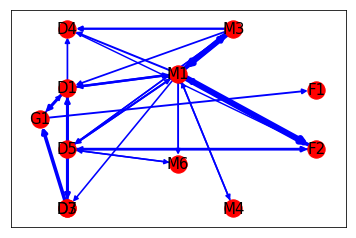

In [129]:
plt.xticks([])
plt.yticks([])
nx.draw_networkx_edges(graph,pos,width=[float((d['weight']-30)*0.04) for (u,v,d) in graph.edges(data=True)],edge_color='b')
nx.draw_networkx_nodes(graph,pos)
nx.draw_networkx_labels(graph,pos,font_size=15,font_family='sans-serif')

In [130]:
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [131]:
plt.savefig('graph.jpg')

<Figure size 432x288 with 0 Axes>

In [132]:
tuple2pass_count

defaultdict(int,
            {('Huskies_D1', 'Huskies_F1'): 23,
             ('Huskies_M1', 'Huskies_F2'): 182,
             ('Huskies_M2', 'Huskies_M3'): 12,
             ('Huskies_D1', 'Huskies_G1'): 107,
             ('Huskies_G1', 'Huskies_G1'): 2,
             ('Huskies_D1', 'Huskies_D2'): 59,
             ('Huskies_D2', 'Huskies_D3'): 49,
             ('Huskies_D3', 'Huskies_G1'): 120,
             ('Huskies_G1', 'Huskies_D3'): 49,
             ('Huskies_D3', 'Huskies_D4'): 59,
             ('Huskies_D4', 'Huskies_D3'): 35,
             ('Huskies_G1', 'Huskies_F1'): 77,
             ('Huskies_D1', 'Huskies_M3'): 51,
             ('Huskies_M3', 'Huskies_M1'): 168,
             ('Huskies_M2', 'Huskies_D3'): 3,
             ('Huskies_D3', 'Huskies_M3'): 54,
             ('Huskies_M3', 'Huskies_D3'): 56,
             ('Huskies_G1', 'Huskies_D1'): 76,
             ('Huskies_D3', 'Huskies_M2'): 5,
             ('Huskies_D3', 'Huskies_D2'): 35,
             ('Huskies_D2', 'Huskies_D1'):

In [133]:
filter_tuple2pass_count = defaultdict(int)
for i in tuple2pass_count.items():
    if i[1]>65:
        filter_tuple2pass_count[i[0]] = i[1]

In [134]:
len(filter_tuple2pass_count)

29

In [135]:
#所有的tuple2都是图结构，每一个键是一个元组，表示箭头方向，由节点0指向节点1，值表示这条边的权重
tuple2pass_count

defaultdict(int,
            {('Huskies_D1', 'Huskies_F1'): 23,
             ('Huskies_M1', 'Huskies_F2'): 182,
             ('Huskies_M2', 'Huskies_M3'): 12,
             ('Huskies_D1', 'Huskies_G1'): 107,
             ('Huskies_G1', 'Huskies_G1'): 2,
             ('Huskies_D1', 'Huskies_D2'): 59,
             ('Huskies_D2', 'Huskies_D3'): 49,
             ('Huskies_D3', 'Huskies_G1'): 120,
             ('Huskies_G1', 'Huskies_D3'): 49,
             ('Huskies_D3', 'Huskies_D4'): 59,
             ('Huskies_D4', 'Huskies_D3'): 35,
             ('Huskies_G1', 'Huskies_F1'): 77,
             ('Huskies_D1', 'Huskies_M3'): 51,
             ('Huskies_M3', 'Huskies_M1'): 168,
             ('Huskies_M2', 'Huskies_D3'): 3,
             ('Huskies_D3', 'Huskies_M3'): 54,
             ('Huskies_M3', 'Huskies_D3'): 56,
             ('Huskies_G1', 'Huskies_D1'): 76,
             ('Huskies_D3', 'Huskies_M2'): 5,
             ('Huskies_D3', 'Huskies_D2'): 35,
             ('Huskies_D2', 'Huskies_D1'):

In [136]:
import random
def random_walk(graph):
    path = []
    if not graph:
        return []
    randcount = random.random()
    randomKeys = random.choice(list(graph.keys()))
    path.append(randomKeys[0])
    path.append(randomKeys[1])
    graph[randomKeys] -=1
    if graph[randomKeys] <=1:
        del[graph[randomKeys]]
    for i in range(0, len(graph)):
        pathlength = len(path)
        filted={}
        for j in list(graph.keys()):
            if j[1] == path[-1]:
                filted.update({j:graph[j]})
        if not filted:
            break
        randomKeys = random.choice(list(filted.keys()))
        path.append(randomKeys[0])
        path.append(randomKeys[1])
        graph[randomKeys] -=1
        if graph[randomKeys] <=1:
            del[graph[randomKeys]]
        if random.random()<0.1: break
        if len(path) == pathlength and len(path) == 20: break
    return path

In [137]:
forward_sequences = []
while True:
    temp = random_walk(tuple2pass_count)
    forward_sequences.append(temp)
    if not temp:
        break

In [138]:
forward_sequences[5]

['Huskies_M8',
 'Huskies_M8',
 'Huskies_F4',
 'Huskies_M8',
 'Huskies_D6',
 'Huskies_M8']

In [138]:
forward_sequences[1]

['Huskies_D9',
 'Huskies_M12',
 'Huskies_G1',
 'Huskies_M12',
 'Huskies_D8',
 'Huskies_M12',
 'Huskies_D8',
 'Huskies_M12',
 'Huskies_D4',
 'Huskies_M12',
 'Huskies_M4',
 'Huskies_M12',
 'Huskies_F4',
 'Huskies_M12']

In [139]:
matches_graphs = []
for i in range(1,39):
    matches_graphs.append(defaultdict(int))
# 每场比赛的传球图
for i in passing.itertuples():
    if i.TeamID == 'Huskies':
        matches_graphs[int(i.MatchID)-1][(i.OriginPlayerID, i.DestinationPlayerID)] += 1

In [140]:
forward_sequences = []
for graph in matches_graphs:
    while True:
        temp = random_walk(graph)
        forward_sequences.append(temp)
        if not temp:
            break

In [141]:
len(forward_sequences)

1266

In [142]:
matches_graphs[0]

defaultdict(int, {})

In [143]:
from gensim.models import Word2Vec

In [144]:
model = Word2Vec(forward_sequences , size=15, window=7, min_count=1, workers=4)

In [145]:
model['Huskies_D1']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.21769628,  0.31292868,  0.29543528,  0.1680042 ,  0.0809608 ,
       -0.5592397 , -0.14942156,  0.39302802,  0.45295233, -0.24989362,
        0.11487874, -0.25524867,  0.7754406 ,  0.5734908 ,  0.5916324 ],
      dtype=float32)

In [146]:
for i in range(10):
    print(model.wv.similarity(sorted_by_pass[i][0],sorted_by_pass[i][1]))

0.8326526
0.9227524
0.9227524
0.9270739
0.8326526
0.9218384
0.93803555
0.93803555
0.72347903
0.7801939


In [147]:
tuple2similar = defaultdict(float)
for i in tuple2pass_count.keys():
    tuple2similar[i] = model.wv.similarity(i[0],i[1])

In [148]:
sorted_by_similar = sorted(tuple2similar.keys(),key = lambda x:tuple2similar[x],reverse=True)

In [149]:
sorted_by_similar[21:32]

[]

In [150]:
for i in sorted_by_similar[21:32]:
    print(tuple2similar[i])

In [151]:
for i in sorted_by_similar[21:32]:
    print(tuple2pass_count[i])

In [152]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [153]:
vocabulary=model.wv.vocab
words=list(vocabulary.keys())
vectors = model[words]
names = list(vocabulary.keys())

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
pca = PCA(n_components=2)
dim2_vectors = pca.fit_transform(vectors)

In [155]:
scaler = MinMaxScaler()
scaler.fit(dim2_vectors)
normalized_vectors=scaler.transform(dim2_vectors)

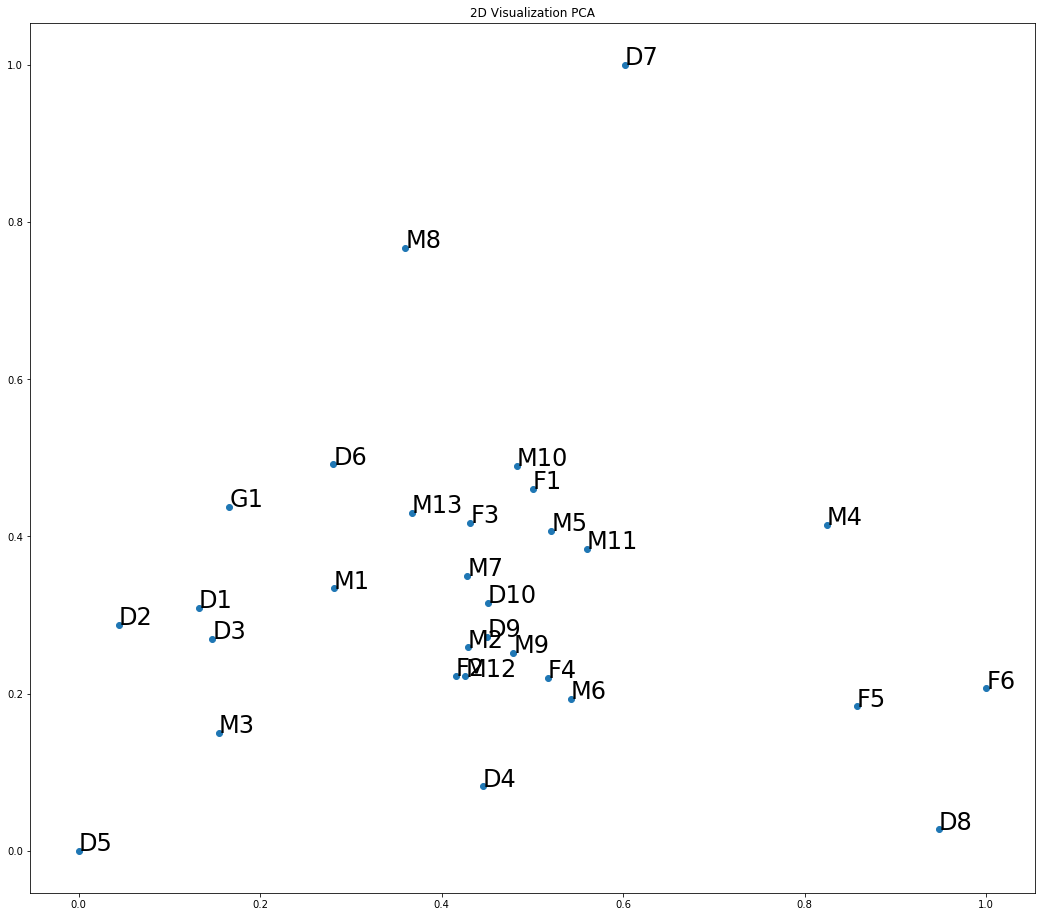

In [156]:
plt.figure(figsize=(18,16))
plt.scatter(normalized_vectors[:,0], normalized_vectors[:,1])
for i in range(len(vocabulary)):
    x = normalized_vectors[i][0]
    y = normalized_vectors[i][1]
    plt.text(x, y, names[i][8:],fontsize=24,)
plt.title("2D Visualization PCA")
plt.show()

In [157]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [158]:
y_pred = DBSCAN(eps = 0.6,min_samples=7).fit_predict(vectors)
y_pred

array([-1, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0,
       -1,  0, -1, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0], dtype=int64)

In [159]:
y_pred = KMeans(n_clusters=5,random_state=20).fit_predict(vectors)
y_pred

array([2, 3, 2, 2, 0, 1, 0, 0, 3, 0, 3, 2, 3, 3, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0])

In [160]:
color_dict = {0:'g',1:'b',2:'r',3:'y',4:'purple'}

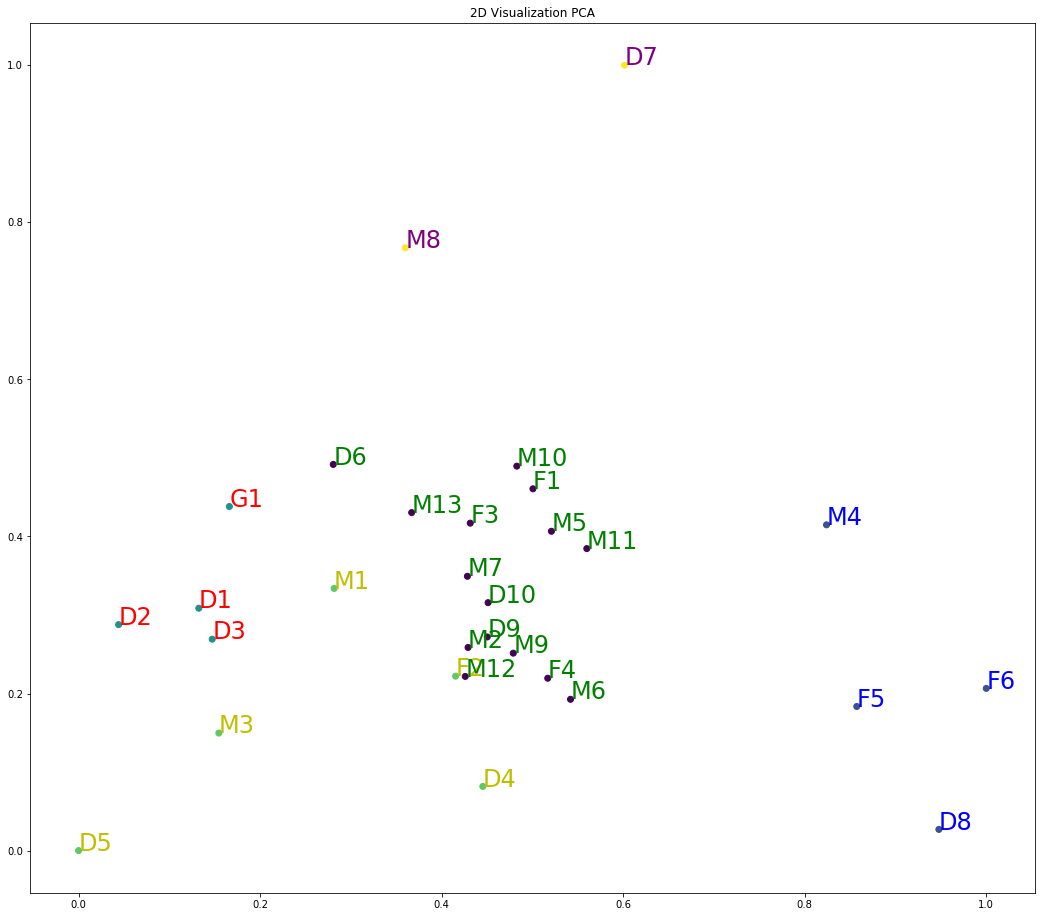

In [161]:
plt.figure(figsize=(18,16))
plt.scatter(normalized_vectors[:,0], normalized_vectors[:,1],c=y_pred)
for i in range(len(vocabulary)):
    x = normalized_vectors[i][0]
    y = normalized_vectors[i][1]
    plt.text(x, y, names[i][8:],fontsize=24,color = color_dict[y_pred[i]])
plt.title("2D Visualization PCA")
plt.show()

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
gbdt_output = pd.DataFrame({"Feature":["F2_F4_M6","F2_Attendance","M6_attendance","D1_D3_D4","M4_attendance","D4_cross","D3_highpass","D1_headpass","num_cross","F2_smart"]
                           ,"Importance":[0.71,0.67,0.67,0.64,0.62,0.60,0.60,0.59,0.57,0.55]})

In [164]:
import seaborn as sns

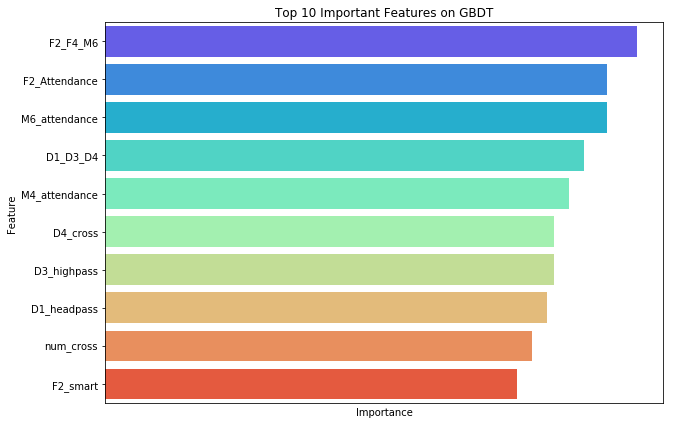

In [165]:
plt.figure(figsize=(10,7))
plt.xticks([])
plt.title("Top 10 Important Features on GBDT")
gbdt_output_sorted = gbdt_output.sort_values(by='Importance',ascending=False)
sns.barplot(data = gbdt_output_sorted,y='Feature', x='Importance', palette='rainbow')

In [166]:
bayes_output = pd.DataFrame({"Feature":["F2_smart","D1_D2_D3","M1_Attendace","Defender Number","M3_smart","num_smart","D7_highpass","D1_headpass","M6_smart","M4_attendance"]
                           ,"Importance":[0.61,0.55,0.54,0.49,0.47,0.44,0.42,0.39,0.32,0.32]})

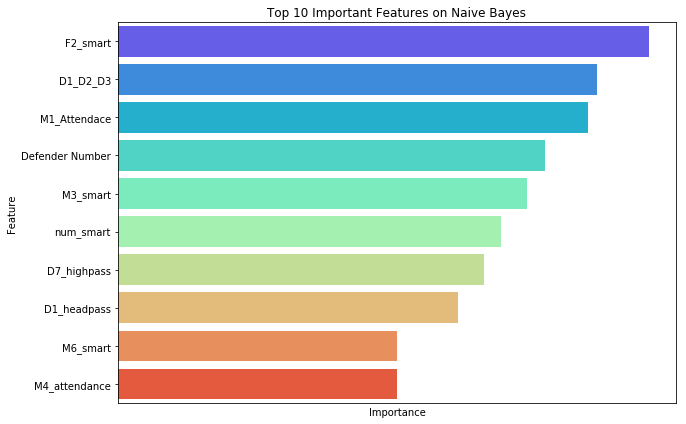

In [167]:
plt.figure(figsize=(10,7))
plt.xticks([])
plt.title("Top 10 Important Features on Naive Bayes")
bayes_output_sorted = bayes_output.sort_values(by='Importance',ascending=False)
sns.barplot(data = bayes_output_sorted,y='Feature', x='Importance', palette='rainbow')